In [25]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from scipy.ndimage import gaussian_filter
from scipy.signal import welch
from scipy.interpolate import interp1d

from config import *
from functions import *
from sim import *
from read_ramses import *


In [75]:
# choose simulation
sim_round = 9
sim_name = "bturb1p0"
sim_dir = move_to_sim_dir(sim_round, sim_name)
sim_latex = sim_name_to_latex[sim_name]
print()

dump = get_dump(aexp=0.1)
info = get_info(dump)

print("Dump: %d" % dump)
print("a_exp: %.3g" % info.aexp)
print("Maximum AMR level: %d" % info.amr_level_max)


Moving to directory '/home/za9132/scratch/romain/round9/bturb1p0'.

Dump: 52
a_exp: 0.1
Maximum AMR level: 13


In [76]:
data = SimpleNamespace(**np.load('starcat/data.npz'))
data.SFR = data.starmass_hist1d / np.diff(data.time1d)[0]


### SFH

Text(0.5, 1.0, '$b_{\\rm turb} = 1.0$')

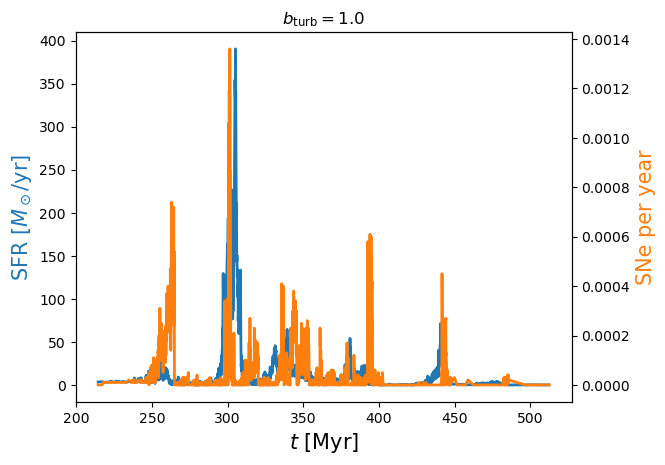

In [77]:
ax1 = plt.gca()
cond = (data.SFR > 0)
ax1.plot(data.time1d[cond] / const.Myr, data.SFR[cond] / (const.M_sol / const.yr), lw=2, color='C0')

ax2 = ax1.twinx()
SNeR = data.starnum_hist1d_death / np.diff(data.time1d)[0]
ax2.plot(data.time1d[cond] / const.Myr, SNeR[cond] * const.yr, lw=2, color='C1')

ax1.set_ylabel(r"SFR [$M_\odot / {\rm yr}$]", color='C0', fontsize=15)
ax2.set_ylabel(r"SNe per year", color='C1', fontsize=15)
ax1.set_xlabel(r"$t$ [Myr]", fontsize=15)
ax1.set_title(sim_latex)

#plt.xlim(510, 540)

# save_fig('SFRandSNeR')


/tmp/ipykernel_348217/2595544464.py:5: RuntimeWarning: divide by zero encountered in log10
  log_SFR = np.log10(SFR_ds)
/usr/licensed/anaconda3/2023.3/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 215, using nperseg = 215
  warnings.warn('nperseg = {0:d} is greater than input length '
/tmp/ipykernel_348217/2595544464.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / freq / const.Myr, psd / const.Myr, lw=2)


Text(0.5, 1.0, '$b_{\\rm turb} = 1.0$')

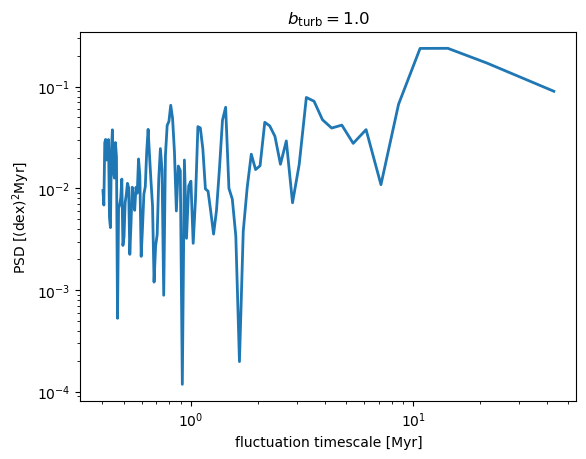

In [13]:
fac_ds = 1
time1d_ds, SFR_ds = downsample_hist(data.time1d, data.SFR, fac_ds=2)

cond = (time1d_ds > 350 * const.Myr) * (SFR_ds > 0)
log_SFR = np.log10(SFR_ds)
freq, psd = welch(log_SFR[cond], 1/(time1d_ds[1] - time1d_ds[0]), detrend='linear')

plt.plot(1 / freq / const.Myr, psd / const.Myr, lw=2)

plt.xlabel(r'fluctuation timescale [Myr]')
plt.ylabel(r'PSD [${\rm (dex)^2 Myr}$]')
plt.xscale('log')
plt.yscale('log')
plt.title(sim_latex)

# save_fig("SFR-dxmin")


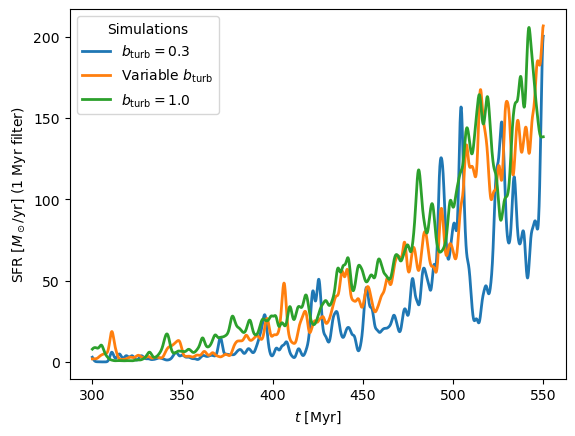

In [8]:
sim_list = [(9, "bturb0p3"), (9, "bturbfunc"), (9, "bturb1p0")]
fsigma = 1 * const.Myr

for sim_round, sim_name in sim_list:
    move_to_sim_dir(sim_round, sim_name, do_print=False)
    sim_latex = sim_name_to_latex[sim_name]
    
    data = SimpleNamespace(**np.load('starcat/data.npz'))
    data.SFR = data.starmass_hist1d / np.diff(data.time1d)[0]
    SFR_sm = gaussian_filter(data.SFR, sigma=(fsigma / np.diff(data.time1d)[0]))
    
    cond = data.time1d > 300 * const.Myr
    plt.plot(data.time1d[cond] / const.Myr, SFR_sm[cond] / (const.M_sol / const.yr), lw=2, label=sim_latex)

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$] ($%.2g~{\rm Myr}$ filter)" % (fsigma / const.Myr))
plt.xlabel(r"$t$ [Myr]")
plt.legend(title='Simulations', fontsize=10)
    

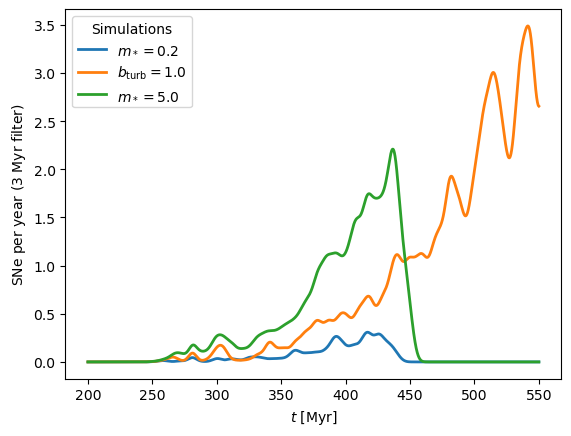

In [10]:
sim_list = [(9, "mstar0p2"), (9, "bturb1p0"), (9, "mstar5p0")]
fsigma = 3 * const.Myr

for sim_round, sim_name in sim_list:
    move_to_sim_dir(sim_round, sim_name, do_print=False)
    sim_latex = sim_name_to_latex[sim_name]
    
    data = SimpleNamespace(**np.load('starcat/data.npz'))
    SNeR = data.starnum_hist1d_death / np.diff(data.time1d)[0]
    SNeR_sm = gaussian_filter(SNeR, sigma=(fsigma / np.diff(data.time1d)[0]))
    
    cond = data.time1d > 200 * const.Myr
    plt.plot(data.time1d[cond] / const.Myr, SNeR_sm[cond] * const.yr, lw=2, label=sim_latex)

plt.ylabel(r"SNe per year ($%.2g~{\rm Myr}$ filter)" % (fsigma / const.Myr))
plt.xlabel(r"$t$ [Myr]")
plt.legend(title='Simulations', fontsize=10)
    

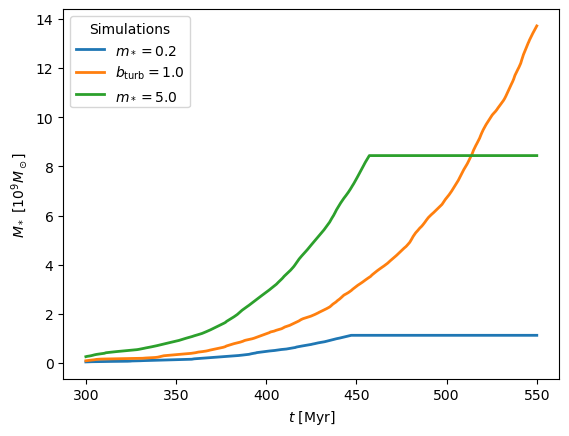

In [433]:
sim_list = [(9, "mstar0p2"), (9, "bturb1p0"), (9, "mstar5p0")]

for sim_round, sim_name in sim_list:
    move_to_sim_dir(sim_round, sim_name, do_print=False)
    sim_latex = sim_name_to_latex[sim_name]
    
    data = SimpleNamespace(**np.load('starcat/data.npz'))
    starmass = np.cumsum(data.starmass_hist1d)
    
    cond = data.time1d > 300 * const.Myr
    plt.plot(data.time1d[cond] / const.Myr, starmass[cond] / (1e9 * const.M_sol), label=sim_latex, lw=2)

plt.ylabel(r"$M_*$ [$10^9 M_\odot$]")
plt.xlabel(r"$t$ [Myr]")
plt.legend(title='Simulations', fontsize=10)


/tmp/ipykernel_3673583/836428221.py:13: RuntimeWarning: divide by zero encountered in log10
  log_SFR = np.log10(SFR_ds)
/tmp/ipykernel_3673583/836428221.py:15: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / freq / const.Myr, psd / const.Myr, lw=2, label=sim_latex)


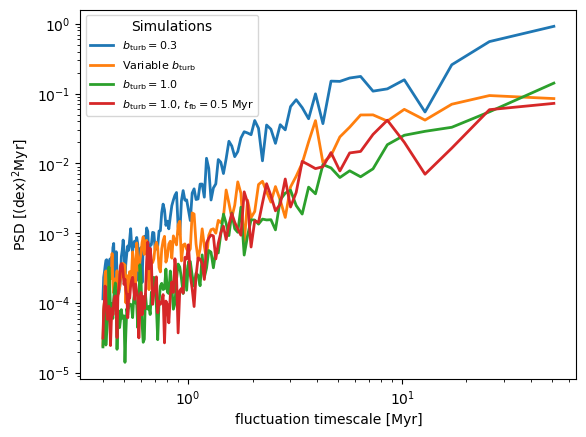

In [306]:
sim_list = [(9, "bturb0p3"), (9, "bturbfunc"), (9, "bturb1p0"), (9, "fastfeedback")]
fac_ds = 1

for sim_round, sim_name in sim_list:
    move_to_sim_dir(sim_round, sim_name, do_print=False)
    sim_latex = sim_name_to_latex[sim_name]
    
    data = SimpleNamespace(**np.load('starcat/data.npz'))
    data.SFR = data.starmass_hist1d / np.diff(data.time1d)[0]  
    time1d_ds, SFR_ds = downsample_hist(data.time1d, data.SFR, fac_ds=2)

    cond = time1d_ds > 400 * const.Myr
    log_SFR = np.log10(SFR_ds)
    freq, psd = welch(log_SFR[cond], 1/(time1d_ds[1] - time1d_ds[0]), detrend='linear')
    plt.plot(1 / freq / const.Myr, psd / const.Myr, lw=2, label=sim_latex)

plt.xlabel(r'fluctuation timescale [Myr]')
plt.ylabel(r'PSD [${\rm (dex)^2 Myr}$]')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Simulations', fontsize=8)


### PDF

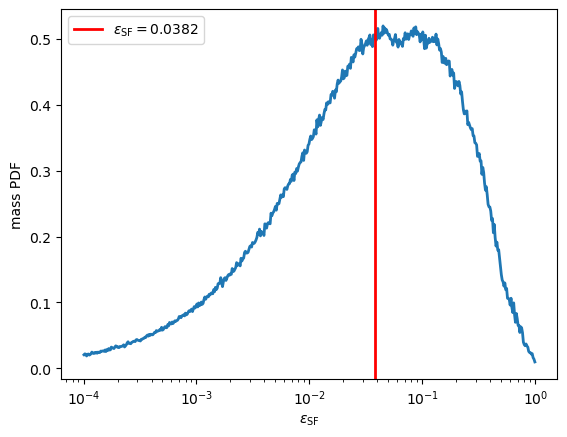

In [31]:
plt.plot(data.eps_sf1d, data.eps_sf_pdf1d, lw=2)
plt.xscale('log')
plt.xlabel(r'$\varepsilon_{\rm SF}$')
plt.ylabel('mass PDF')

eps_sf_median = median_weighted(data.eps_sf1d, data.eps_sf_pdf1d)
plt.axvline(x=eps_sf_median, lw=2, color='red')
add_custleg_to_ax([r'$\varepsilon_{\rm SF} = %.3g$' % eps_sf_median], ['red'])


Text(0, 0.5, 'mass PDF')

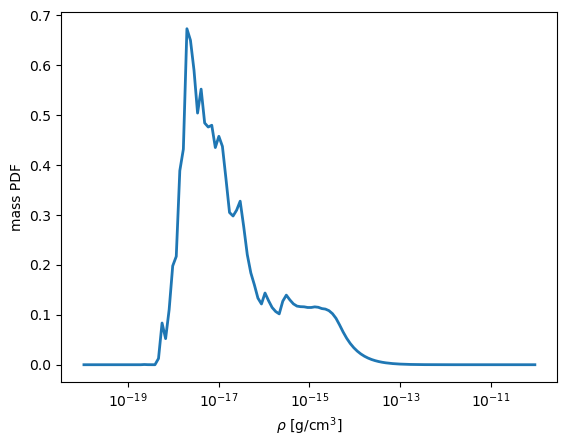

In [24]:
plt.plot(data.density_mff1d, data.density_mff_pdf1d, lw=2)
plt.xscale('log')
plt.xlabel(r'$\rho$ [${\rm g/cm^3}$]')
plt.ylabel('mass PDF')

# eps_sf_median = median_weighted(data.eps_sf1d, data.eps_sf_pdf1d)
# plt.axvline(x=eps_sf_median, lw=2, color='red')
# add_custleg_to_ax([r'$\varepsilon_{\rm SF} = %.3g$' % eps_sf_median], ['red'])


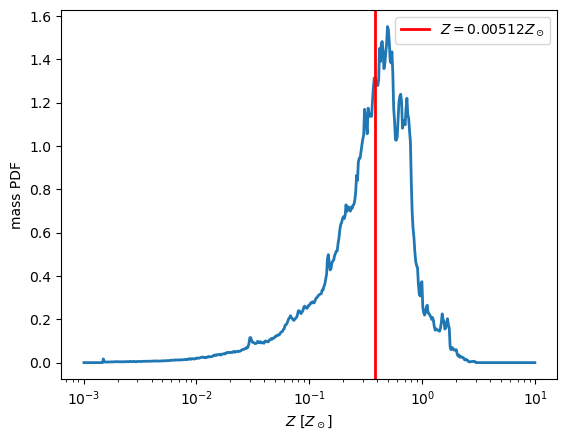

In [308]:
plt.plot(data.metallicity1d / const.Z_sol, data.metallicity_pdf1d, lw=2)
plt.xscale('log')
plt.xlabel(r'$Z$ [$Z_\odot$]')
plt.ylabel('mass PDF')

metallicity_median = median_weighted(data.metallicity1d, data.metallicity_pdf1d)
plt.axvline(x=metallicity_median / const.Z_sol, lw=2, color='red')
add_custleg_to_ax([r'$Z = %.3g Z_\odot$' % metallicity_median], ['red'])


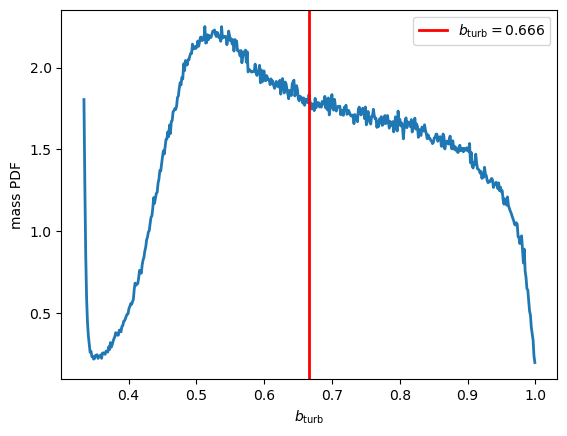

In [346]:
plt.plot(data.b_turb1d, data.b_turb_pdf1d, lw=2)
plt.xlabel(r'$b_{\rm turb}$')
plt.ylabel('mass PDF')

b_turb_median = median_weighted(data.b_turb1d, data.b_turb_pdf1d)
plt.axvline(x=b_turb_median, lw=2, color='red')
add_custleg_to_ax([r'$b_{\rm turb} = %.3g$' % b_turb_median], ['red'])


Text(0, 0.5, 'mass PDF')

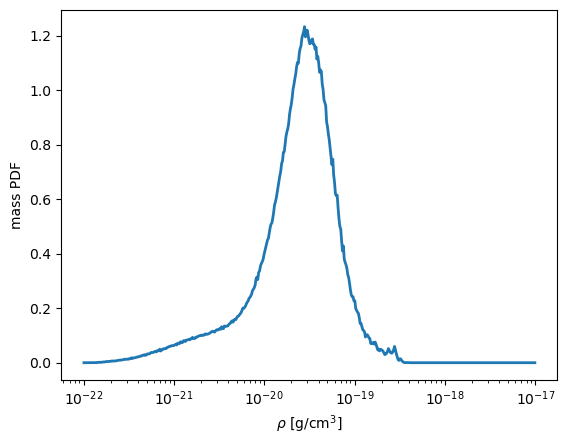

In [35]:
plt.plot(data.density1d, data.density_pdf1d, lw=2)
plt.xscale('log')
plt.xlabel(r'$\rho$ [${\rm g/cm^3}$]')
plt.ylabel('mass PDF')


Text(0, 0.5, 'mass PDF')

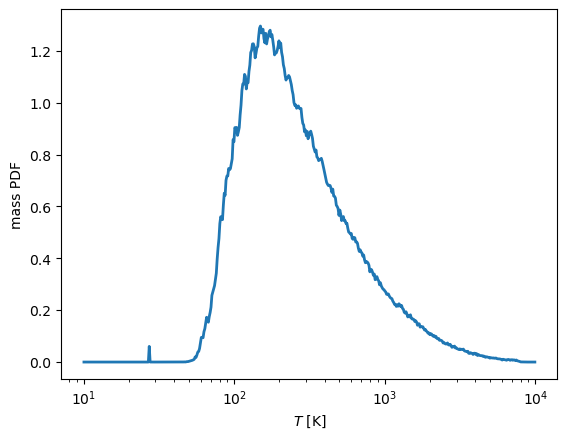

In [37]:
plt.plot(data.temp1d, data.temp_pdf1d, lw=2)
plt.xscale('log')
plt.xlabel(r'$T$ [${\rm K}$]')
plt.ylabel('mass PDF')


In [62]:
data.starmass_pdf1d

array([0., 0., 0., ..., 0., 0., 0.])

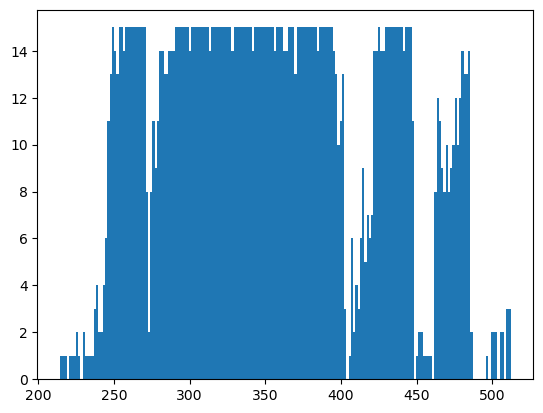

In [73]:
plt.hist(data.time1d[data.starnum_pdf1d > 0]/const.Myr, bins=200);

Text(0, 0.5, 'mass PDF')

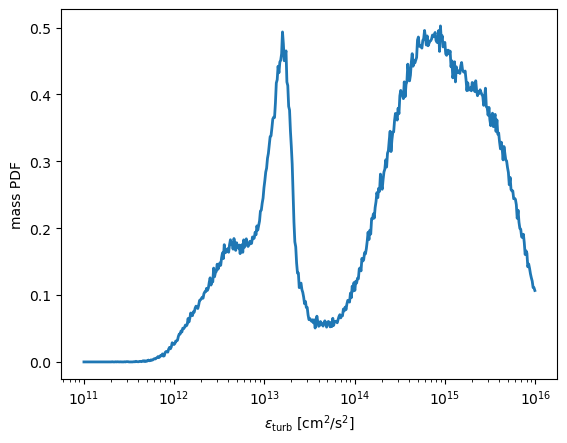

In [66]:
plt.plot(data.energy_turb1d, data.energy_turb_pdf1d, lw=2)
plt.xscale('log')
plt.xlabel(r'$\varepsilon_{\rm turb}$ [${\rm cm^2/s^2}$]')
plt.ylabel('mass PDF')


0.0399
0.00874
0.00101
Saved figure as 'mgas-comp-mstar-012620241459.png'


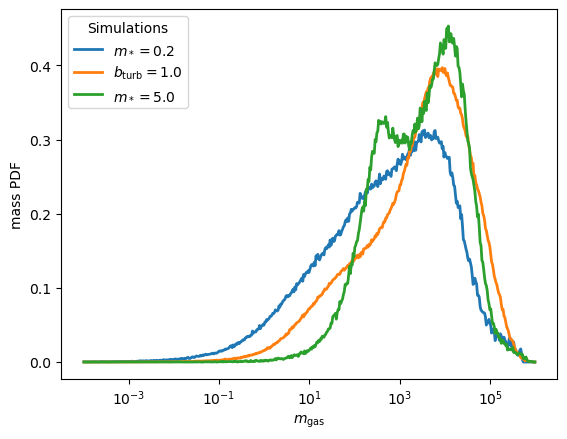

In [41]:
sim_list = [(9, "mstar0p2"), (9, "bturb1p0"), (9, "mstar5p0")]

for i, (sim_round, sim_name) in enumerate(sim_list):
    move_to_sim_dir(sim_round, sim_name, do_print=False)
    sim_latex = sim_name_to_latex[sim_name]
    data = SimpleNamespace(**np.load('starcat/data.npz'))
    plt.plot(data.m_gas1d / const.M_sol, data.m_gas_pdf1d, lw=2, label=sim_latex)
    frac = np.sum(data.m_gas_pdf1d[data.m_gas1d < const.M_sol]) / np.sum(data.m_gas_pdf1d)
    print('%.3g' % frac)

plt.xscale('log')
plt.xlabel(r'$m_{\rm gas}$')
plt.ylabel('mass PDF')
plt.legend(title='Simulations', fontsize=10)

save_fig('mgas-comp-mstar')


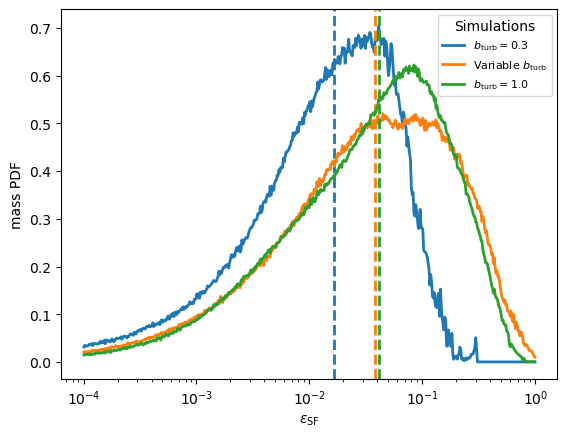

In [352]:
sim_list = [(9, "bturb0p3"), (9, "bturbfunc"), (9, "bturb1p0")]

for i, (sim_round, sim_name) in enumerate(sim_list):
    move_to_sim_dir(sim_round, sim_name, do_print=False)
    sim_latex = sim_name_to_latex[sim_name]
    
    data = SimpleNamespace(**np.load('starcat/data.npz'))
    
    plt.plot(data.eps_sf1d, data.eps_sf_pdf1d, lw=2, label=sim_latex)

    eps_sf_median = median_weighted(data.eps_sf1d, data.eps_sf_pdf1d)
    plt.axvline(x=eps_sf_median, lw=2, color='C%d' % i, linestyle='--')

plt.xscale('log')
plt.xlabel(r'$\varepsilon_{\rm SF}$')
plt.ylabel('mass PDF')
plt.legend(title='Simulations', fontsize=8)

# save_fig('epssf-comp-mstar')


### phase space

Moving to directory '/home/za9132/scratch/romain/round9/mstar5p0'.


Text(0.5, 0, 'mass PDF')

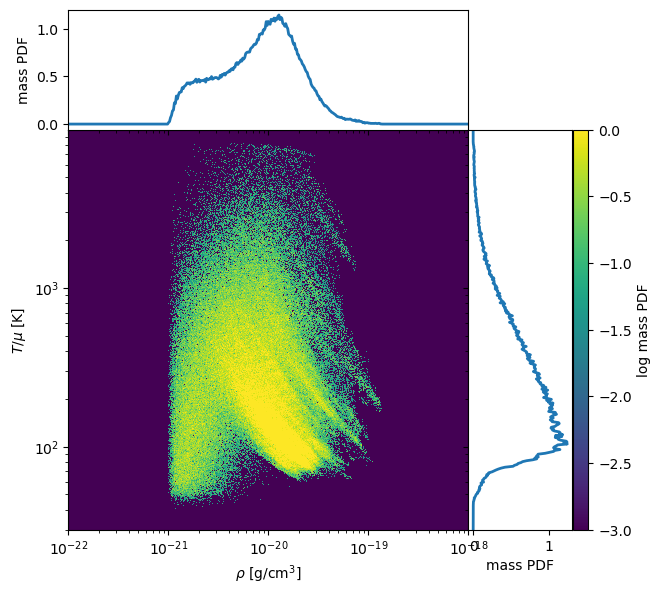

In [454]:
sim_dir = move_to_sim_dir(9, "mstar5p0")
data = SimpleNamespace(**np.load('starcat/data.npz'))

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])
im = ax1.pcolormesh(data.density2d, data.temp2d, np.log10(data.densitytemp_pdf2d + epsilon), vmin=-3, vmax=0)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-22, 1e-18)
ax1.set_ylim(30)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.plot(data.density1d, data.density_pdf1d, lw=2)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.plot(data.temp_pdf1d, data.temp1d, lw=2)

add_cbar_to_ax(im, ax=ax3, size='15%', pad=0.01, label='log mass PDF')
ax1.set_xlabel(r'$\rho$ [${\rm g/cm^3}$]')
ax1.set_ylabel(r'$T / \mu$ [${\rm K}$]')
ax2.set_ylabel('mass PDF')
ax3.set_xlabel('mass PDF')


Moving to directory '/home/za9132/scratch/romain/round9/mstar5p0'.


Text(0.5, 0, 'mass PDF')

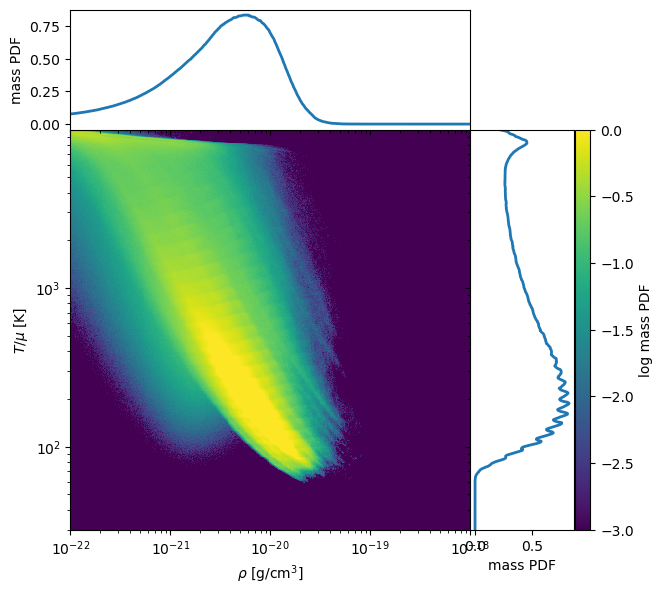

In [455]:
sim_dir = move_to_sim_dir(9, "mstar5p0")
data = SimpleNamespace(**np.load('starcat/data.npz'))

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])
im = ax1.pcolormesh(data.density2d, data.temp2d, np.log10(data.densitytemp_pdf2d_death + epsilon), vmin=-3, vmax=0)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-22, 1e-18)
ax1.set_ylim(30)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.plot(data.density1d, data.density_pdf1d_death, lw=2)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.plot(data.temp_pdf1d_death, data.temp1d, lw=2)

add_cbar_to_ax(im, ax=ax3, size='15%', pad=0.01, label='log mass PDF')
ax1.set_xlabel(r'$\rho$ [${\rm g/cm^3}$]')
ax1.set_ylabel(r'$T / \mu$ [${\rm K}$]')
ax2.set_ylabel('mass PDF')
ax3.set_xlabel('mass PDF')


Moving to directory '/home/za9132/scratch/romain/round9/bturbfunc'.


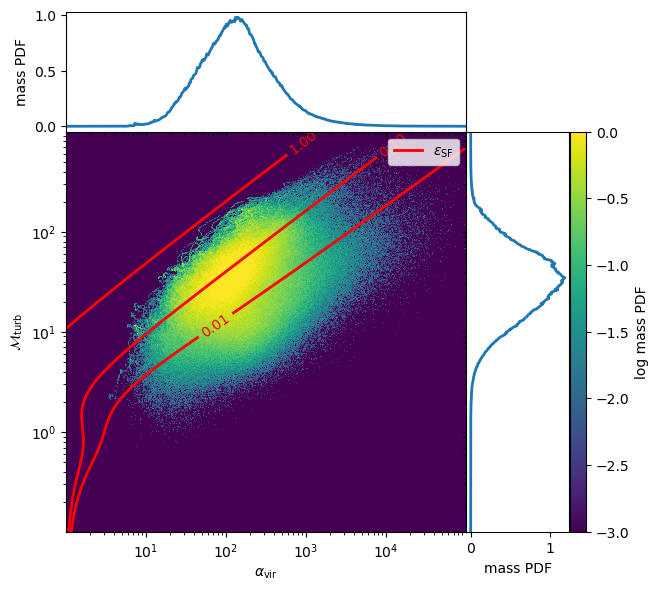

In [450]:
sim_dir = move_to_sim_dir(9, "bturbfunc")
data = SimpleNamespace(**np.load('starcat/data.npz'))

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])
im = ax1.pcolormesh(data.alpha_vir2d, data.mach_turb2d, np.log10(data.alpha_virmach_turb_pdf2d + epsilon), vmin=-3, vmax=0)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.plot(data.alpha_vir1d, data.alpha_vir_pdf1d, lw=2)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.plot(data.mach_turb_pdf1d, data.mach_turb1d, lw=2)

add_cbar_to_ax(im, ax=ax3, size='15%', pad=0.01, label='log mass PDF')
ax1.set_xlabel(r'$\alpha_{\rm vir}$')
ax1.set_ylabel(r'$\mathcal{M}_{\rm turb}$')
ax2.set_ylabel('mass PDF')
ax3.set_xlabel('mass PDF')

eps_sf = calc_eps_sf(data.alpha_vir2d, data.mach_turb2d, b_turb=0.666)
cs = ax1.contour(data.alpha_vir2d, data.mach_turb2d, eps_sf, levels=[1e-2, 1e-1, 1e0], colors='red', linewidths=2)
plt.clabel(cs, [1e-2, 1e-1, 1e0])
add_custleg_to_ax([r'$\varepsilon_{\rm SF}$'], ['red'], ax=ax1)


Text(0.5, 0, 'mass PDF')

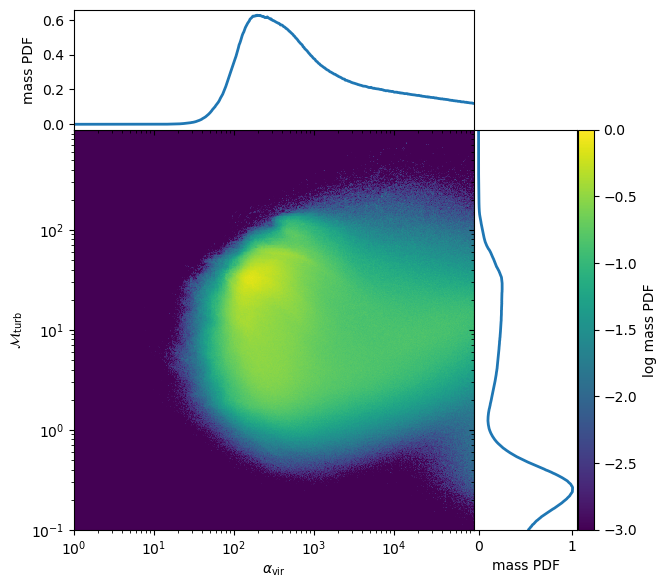

In [447]:
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])
im = ax1.pcolormesh(data.alpha_vir2d, data.mach_turb2d, np.log10(data.alpha_virmach_turb_pdf2d_death + epsilon), vmin=-3, vmax=0)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.plot(data.alpha_vir1d, data.alpha_vir_pdf1d_death, lw=2)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.plot(data.mach_turb_pdf1d_death, data.mach_turb1d, lw=2)

add_cbar_to_ax(im, ax=ax3, size='15%', pad=0.01, label='log mass PDF')
ax1.set_xlabel(r'$\alpha_{\rm vir}$')
ax1.set_ylabel(r'$\mathcal{M}_{\rm turb}$')
ax2.set_ylabel('mass PDF')
ax3.set_xlabel('mass PDF')

# eps_sf = calc_eps_sf(data.alpha_vir2d, data.mach_turb2d, b_turb=1.0)
# cs = ax1.contour(data.alpha_vir2d, data.mach_turb2d, eps_sf, levels=[1e-2, 1e-1, 1e0], colors='red', linewidths=2)
# plt.clabel(cs, [1e-2, 1e-1, 1e0])
# add_custleg_to_ax([r'$\varepsilon_{\rm SF}$'], ['red'], ax=ax1)


In [ ]:
dump_list = get_dump_list()
    for dump in dump_list:
        info = get_info(dump)
        
        # prepare for time calculation
        age_universe = aexp_to_proper_time(1.0, Omega_m0=info.Omega_m0, Omega_k0=info.Omega_k0, Omega_L0=info.Omega_L0, H0=info.H0)
        
        # get field and weight units
        col_unit_list = np.array([1., 1., 1., info.mass_unit, info.length_unit, info.length_unit, info.length_unit, info.vel_unit, info.vel_unit, info.vel_unit, info.density_unit, info.vel_unit, info.vel_unit, info.vel_unit, 1., 1., info.vel_unit**2, 1., 1., 1., 1/info.H0])
        
        filename = "output_%.5d/stars_%.5d.out%.5d" % (dump, dump, idx_cpu)
        if os.path.isfile(filename):
            
            # check if the star log is empty
            num_line = get_numline(filename)
            if num_line > 1:
                
                # read the star log
                with open(filename, "r") as f:
                    stardata = ascii.read(filename, names=col_name_list, data_start=1)
                    
                # preprocess star log data
                for col_name, col_unit in zip(col_name_list, col_unit_list):
                    if col_name != 'mask':
                        stardata[col_name] = np.array(stardata[col_name].data) * col_unit
                        if col_name == 'time': stardata[col_name] += age_universe
                
                # add derived quantities to stardata
                for funcname, func in func_dict.items():
                    stardata[funcname] = func(stardata)

                print('min %.3g' % np.min(stardata['energy_turb']), end=', ')
                print('max %.3g' % np.max(stardata['energy_turb']), end=', ')
                print('mean %.3g' % np.mean(stardata['energy_turb']))
               
                # calculate histograms
                for i, histparam in enumerate(histparam_list):
                    if histparam.dim == 1:
                        if histparam.field == 'density_mff':
                            hist_list_birth_1cpu[i] += np.nan_to_num(calc_hist_density_mff(stardata, histparam))
                        else:
                            field = stardata[histparam.field]
                            weight = np.ones_like(field) if histparam.weight == None else stardata[histparam.weight]
                            hist_list_birth_1cpu[i] += calc_hist(field[stardata['event']==BIRTH], vmin=histparam.vmin, vmax=histparam.vmax, weight=weight[stardata['event']==BIRTH], nbins=histparam.nbins, do_log=histparam.do_log)[1]
                            if histparam.do_death: hist_list_death_1cpu[i] += calc_hist(field[stardata['event']==DEATH], vmin=histparam.vmin, vmax=histparam.vmax, weight=weight[stardata['event']==DEATH], nbins=histparam.nbins, do_log=histparam.do_log)[1]
                    else:
                        field1, field2 = stardata[histparam.field1], stardata[histparam.field2]
                        weight = np.ones_like(field) if histparam.weight == None else stardata[histparam.weight]
                        hist_list_birth_1cpu[i] += calc_hist2d(field1[stardata['event']==BIRTH], field2[stardata['event']==BIRTH], vmin1=histparam.vmin1, vmax1=histparam.vmax1, vmin2=histparam.vmin2, vmax2=histparam.vmax2, weight=weight[stardata['event']==BIRTH], nbins=histparam.nbins, do_log1=histparam.do_log1, do_log2=histparam.do_log2)[2]
                        if histparam.do_death: hist_list_death_1cpu[i] += calc_hist2d(field1[stardata['event']==DEATH], field2[stardata['event']==DEATH], vmin1=histparam.vmin1, vmax1=histparam.vmax1, vmin2=histparam.vmin2, vmax2=histparam.vmax2, weight=weight[stardata['event']==DEATH], nbins=histparam.nbins, do_log1=histparam.do_log1, do_log2=histparam.do_log2)[2]

        # break if beyond max scale factor
        if info.aexp > args.aexpmax: break